<br>

####   hw5pr3owndata_modeler 
+ clasification or regression of via decision trees and random forests of your own dataset...
+ [here is the assignment page](https://docs.google.com/document/d/1oLNNM8jfWdG3xXvmRojXLgDWE-mFNgQUsohZ4dmfPV0/edit)
+ [here is the hw5 page, specifically](https://docs.google.com/document/d/1l82PGTqIQkFJAGRCv0hxa2ifccM0YFzIYRzsBib2dAM/edit)


In [1]:
#
# SUGGESTION:  
# 
# +++ copy-paste-and-alter from the week5 iris- + births + digits + titanic-modeling notebooks into here +++
#

In [2]:

import numpy as np      # numpy is Python's "array" library
import pandas as pd  

In [3]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [4]:
rhp = pd.read_csv('./rhp.csv')


rph = clean_dataset(rhp)


label = ['Fastball','Slider','ChangeUp','Cutter','Curveball','Sinker','Splitter','Other']

label_index = {}
for i, name in enumerate(label):
    label_index[name] = i





# rhp['TaggedPitchNum'] = rhp['TaggedPitchNum'].apply(convert_species)

# rhp

A = rhp.to_numpy()   
A = A.astype('float64')  # so many:  www.tutorialspoint.com/numpy/numpy_data_types.htm

X_all = A[:,0:11]  # X (features) ... is all rows, columns 0, 1, 2, 3
y_all = A[:,11] 





from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

In [5]:
from sklearn import tree      # for decision trees

best_depth = 1   # we don't know what depth to use, so let's guess 1
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)

# Let's train the model.   It's this one line:
dtree_model.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth) 

Created and trained a DT classifier with max depth = 1


In [1]:
filename = 'tree_data.gv' 

COLUMNS = rhp.columns
print(COLUMNS)   

tree.export_graphviz(dtree_model, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names, not species
                            filled=True,              
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names= label,      # good to have   
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try pasting its contents to  http://viz-js.com/")

# with open(filename, "r") as f:
#     all_file_text = f.read()
#     print(all_file_text)

# from IPython import display
# display.Image("./bsbl_tree1.png")

NameError: name 'rhp' is not defined

In [7]:
from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

best_d = 1
best_accuracy = 0.0

for d in range(1,6):
    cv_model = tree.DecisionTreeClassifier(max_depth=d)   # for each depth, d
    cv_scores = cross_val_score( cv_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
    # print(cv_scores)  # we usually don't want to see the five individual scores 
    average_cv_accuracy = cv_scores.mean()  # more likely, only their average
    print(f"depth: {d:2d}  cv accuracy: {average_cv_accuracy:7.4f}")
    
    if average_cv_accuracy > best_accuracy:
        best_accuracy = average_cv_accuracy
        best_d = d

    
    
# assign best value of d to best_depth
best_depth = best_d   # may have to hand-tune this, depending on what happens...
print()
print(f"best_depth = {best_depth} is our choice for an underfitting/overfitting balance.")  

C:\Users\jvw42\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\jvw42\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\jvw42\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


depth:  1  cv accuracy:  0.7199
depth:  2  cv accuracy:  0.7904
depth:  3  cv accuracy:  0.8760


C:\Users\jvw42\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


depth:  4  cv accuracy:  0.8752
depth:  5  cv accuracy:  0.8888

best_depth = 5 is our choice for an underfitting/overfitting balance.


C:\Users\jvw42\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Created and trained a DT classifier with max depth = 3


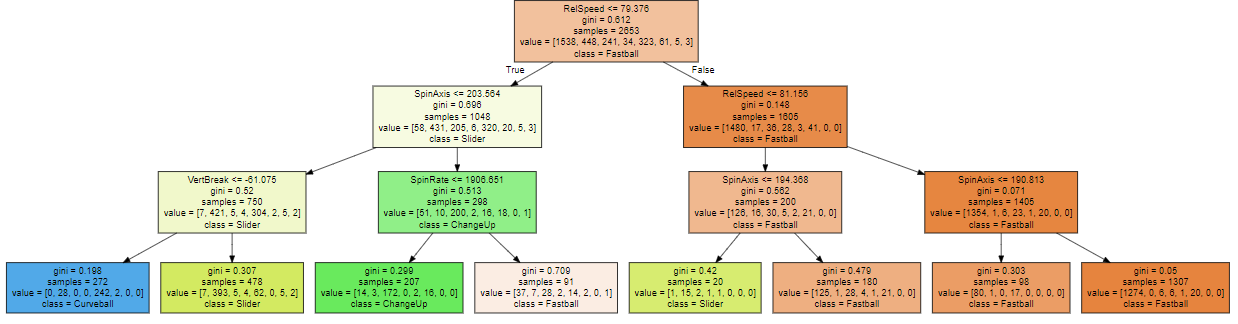

In [8]:
best_depth = 3   #guess
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)

# Let's train the model.   It's this one line:
dtree_model.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth) 


# filename = 'tree_data_d3.gv'    # sometimes .dot is used, instead of .gv

# tree.export_graphviz(dtree_model, out_file=filename,  # the filename constructed above...!
#                             feature_names=COLUMNS[:-1], # actual feature names, not species
#                             filled=True,              # fun!
#                             rotate=False,             # False for Up/Down; True for L/R
#                             class_names=label,      # good to have   
#                             leaves_parallel=True )    # lots of options!

# print(f"file {filename} written. Try pasting its contents to  http://viz-js.com/\n")

# with open(filename, "r") as f:
#     all_file_text = f.read()
#     print(all_file_text)

display.Image("./bsbl_tree3.png")


In [9]:
dtree_model_final = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_final.fit(X_all, y_all)  

def predictive_model( Features ):
    """ input: a list of four features 
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = dtree_model_final.predict(our_features)
    
    predicted_species = int(round(predicted_species[0]))  # unpack one element
    name = label[predicted_species]
    return f"{name} ({predicted_species})"

In [ ]:
predicted_labels = rforest_model_tuned.predict(X_test)
actual_labels = y_test

In [10]:
print(dtree_model_final.feature_importances_)
print()

x = rhp.copy()

x = x.drop('TaggedPitchNum' , axis =1)
columns = x.columns
columns

# x
# let's see them with each feature name:
IMPs = dtree_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {columns[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.61405973 0.         0.         0.         0.20771309 0.16872335
 0.00950383 0.         0.         0.         0.        ]

Feature     RelSpeed has   61.41% of the decision-making importance.
Feature     SpinRate has    0.00% of the decision-making importance.
Feature VertRelAngle has    0.00% of the decision-making importance.
Feature HorzRelAngle has    0.00% of the decision-making importance.
Feature     SpinAxis has   20.77% of the decision-making importance.
Feature    VertBreak has   16.87% of the decision-making importance.
Feature InducedVertBreak has    0.95% of the decision-making importance.
Feature VertApprAngle has    0.00% of the decision-making importance.
Feature HorzApprAngle has    0.00% of the decision-making importance.
Feature PlateLocHeight has    0.00% of the decision-making importance.
Feature PlateLocSide has    0.00% of the decision-making importance.


In [11]:
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests, an ensemble classifier

best_d = 1            # we don't know what depth to use, so we guess...
best_num_trees = 40   # again, we guess
rforest_model = ensemble.RandomForestClassifier(max_depth=best_d, 
                                                n_estimators=best_num_trees,
                                                max_samples=0.5)  
# This max_samples=0.5 is the fraction of rows to use for each DT 
# For all of our forests, we will let max_samples be 0.5   We'll explore best_d and best_num_trees...

# we train the model (again, one line):
rforest_model.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF with depth={best_d} and number of trees={best_num_trees}") 

Built an RF with depth=1 and number of trees=40


In [12]:


def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0
    
    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error 
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            num_correct += 1  # and we count a match!

        print(f"row {i:>3d} : {label[p]:>12s} {label[a]:<12s}   {result}")   

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

predicted_labels = rforest_model.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0.
 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.

503

In [13]:

#
# So, to compare different parameters, let's use cv
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

#
# lab task:  wrap this loop in another one! (or create an inner one...)
#

best_d, best_ntrees = 1, 50   # range(50,300,100)
best_score = 0

for d in range(1,6):
    for ntrees in range(50,300,100):
        rforest_model = ensemble.RandomForestClassifier(max_depth=d, 
                                                        n_estimators=ntrees,
                                                        max_samples=0.5)
        cv_scores = cross_val_score( rforest_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
        average_cv_accuracy = cv_scores.mean()  # more likely, only their average
        if average_cv_accuracy > best_score:
            best_score = average_cv_accuracy
            best_d, best_ntrees = d, ntrees
        print(f"depth: {d:2d} ntrees: {ntrees:3d} cv accuracy: {average_cv_accuracy:7.4f}")

# 
# your task: assign best values by keeping a "running max"
#
best_depth = best_d   
best_num_trees = best_ntrees

# This will be incorrect when initially run (you'll fix it):
print()
print(f"best_depth: {best_depth} and best_num_trees: {best_num_trees} are our choices.")  

#
# remember that the RF lab task is to complete this nested cross-validation loop!
#

C:\Users\jvw42\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


depth:  1 ntrees:  50 cv accuracy:  0.7290


C:\Users\jvw42\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


depth:  1 ntrees: 150 cv accuracy:  0.7305


C:\Users\jvw42\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


depth:  1 ntrees: 250 cv accuracy:  0.7309


C:\Users\jvw42\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


depth:  2 ntrees:  50 cv accuracy:  0.8613


C:\Users\jvw42\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


depth:  2 ntrees: 150 cv accuracy:  0.8703


C:\Users\jvw42\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


depth:  2 ntrees: 250 cv accuracy:  0.8715


C:\Users\jvw42\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


depth:  3 ntrees:  50 cv accuracy:  0.8850


C:\Users\jvw42\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


depth:  3 ntrees: 150 cv accuracy:  0.8824


C:\Users\jvw42\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


depth:  3 ntrees: 250 cv accuracy:  0.8839


C:\Users\jvw42\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


depth:  4 ntrees:  50 cv accuracy:  0.8907


C:\Users\jvw42\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


depth:  4 ntrees: 150 cv accuracy:  0.8911


C:\Users\jvw42\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


depth:  4 ntrees: 250 cv accuracy:  0.8903


C:\Users\jvw42\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


depth:  5 ntrees:  50 cv accuracy:  0.8990


C:\Users\jvw42\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


depth:  5 ntrees: 150 cv accuracy:  0.8986


C:\Users\jvw42\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


depth:  5 ntrees: 250 cv accuracy:  0.8971

best_depth: 5 and best_num_trees: 50 are our choices.


In [14]:

from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests
best_depth = 5
best_num_trees = 150
# we should have best_depth and best_num_trees
rforest_model_tuned = ensemble.RandomForestClassifier(max_depth=best_depth, 
                                                      n_estimators=best_num_trees,
                                                      max_samples=0.5)

# we train the model (it's one line!)
rforest_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}") 


Built an RF classifier with depth=5 and ntrees=150


In [15]:
predicted_labels = rforest_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [0. 0. 0. 0. 2. 0. 0. 4. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 1. 4. 2. 4. 2.
 2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 4. 4. 0. 0. 2. 2. 0. 0. 0. 4. 1. 0.
 0. 4. 0. 2. 1. 0. 0. 1. 4. 0. 0. 1. 0. 0. 4. 1. 2. 0. 0. 0. 4. 1. 4. 2.
 2. 0. 0. 0. 0. 0. 4. 0. 4. 0. 1. 0. 4. 1. 0. 0. 0. 0. 1. 4. 0. 0. 0. 4.
 0. 0. 4. 1. 0. 0. 1. 0. 0. 0. 0. 2. 4. 1. 0. 0. 0. 0. 0. 0. 0. 4. 4. 0.
 0. 0. 2. 4. 0. 1. 0. 1. 2. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0.
 0. 1. 1. 1. 4. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 2. 0. 0. 1. 1. 1. 0. 0. 2. 0. 1. 1. 0. 0. 1. 0. 0. 4.
 0. 2. 0. 4. 0. 0. 4. 4. 0. 0. 4. 0. 0. 4. 1. 0. 0. 0. 0. 0. 1. 0. 1. 4.
 0. 0. 0. 0. 0. 4. 1. 0. 0. 0. 4. 0. 0. 1. 0. 0. 0. 0. 4. 0. 0. 4. 1. 0.
 2. 2. 0. 0. 4. 2. 1. 0. 0. 4. 1. 0. 4. 0. 0. 0. 4. 4. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 2. 0. 4. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 4. 0. 0. 0. 1. 0.
 1. 4. 0. 4. 1. 2. 0. 1. 0. 0. 0.

603

In [19]:

rforest_model_final = ensemble.RandomForestClassifier(max_depth=best_depth, n_estimators=best_num_trees,
                                                    max_samples=0.5)



columns =rhp.columns[:-1]

# we train the model (it's one line!)
rforest_model_final.fit(X_all, y_all)              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}") 
# let's see them with each feature name:
IMPs = rforest_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {columns[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")


print(rforest_model_final.feature_importances_)
print()

Built an RF classifier with depth=5 and ntrees=150
Feature     RelSpeed has   25.93% of the decision-making importance.
Feature     SpinRate has    6.31% of the decision-making importance.
Feature VertRelAngle has    1.88% of the decision-making importance.
Feature HorzRelAngle has    1.32% of the decision-making importance.
Feature     SpinAxis has   22.35% of the decision-making importance.
Feature    VertBreak has   22.85% of the decision-making importance.
Feature InducedVertBreak has    9.95% of the decision-making importance.
Feature VertApprAngle has    5.76% of the decision-making importance.
Feature HorzApprAngle has    2.56% of the decision-making importance.
Feature PlateLocHeight has    0.54% of the decision-making importance.
Feature PlateLocSide has    0.54% of the decision-making importance.
[0.25933298 0.06311523 0.0187937  0.01323945 0.22347339 0.22854268
 0.09951825 0.05758543 0.02564531 0.00536003 0.00539353]



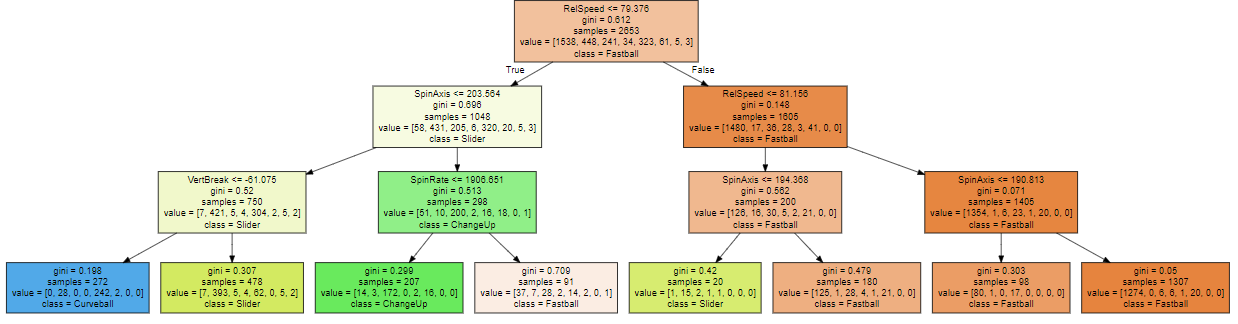

In [20]:
display.Image("./bsbl_tree3.png")

#### Takeaway

As a person with experience playing baseball and understanding different pitches and how they are meant to move and spin, I find the decision tree above to be pretty intuitive. I think checking the speed of a pitch first is a great indicator and next considering the spin axis, spin rate, and vertical break is a logical progression. All in all I am pleased the tree chose the features it did considering we gave it about 10 or 11 different features to consider.

The limitations/strength of this tree is that it only predicts either fastball, slider,  changeup or curveball. This is a limitation because the dataset included about 7 different pitch types, but this is a strength becasue the most common pitches are these 4 so the model is still staying quite general. I'm sure with more depth the tree could guess a different variety of pitches

I am very pleased to see that the random forest model did much better than the decision tree model. This makes sense as the random forest gets a better view of all of the data and can be more flexible and recognize edge case pitches. What I liked to see was that the random forest was considering more features as important:

Feature     RelSpeed has   25.93% of the decision-making importance.   
Feature     SpinRate has    6.31% of the decision-making importance.  
Feature VertRelAngle has    1.88% of the decision-making importance.  
Feature HorzRelAngle has    1.32% of the decision-making importance.  
Feature     SpinAxis has   22.35% of the decision-making importance.  
Feature    VertBreak has   22.85% of the decision-making importance.   
Feature InducedVertBreak has    9.95% of the decision-making importance.   
Feature VertApprAngle has    5.76% of the decision-making importance.  
Feature HorzApprAngle has    2.56% of the decision-making importance.   
Feature PlateLocHeight has    0.54% of the decision-making importance.   
Feature PlateLocSide has    0.54% of the decision-making importance.  


Whereas the decision relied heavily on only 3 features:

Feature     RelSpeed has   61.41% of the decision-making importance.   
Feature     SpinAxis has   20.77% of the decision-making importance.  
Feature    VertBreak has   16.87% of the decision-making importance.  


I went into this thinking a decision tree would not be a great way to model pitches but  
after seeing how KNN forces an exchange rate on features with varing levels of importance
I see the power of a decision tree or random forest.